### Part 1: Data Cleaning

##### 1.1 Load the raw data

In [0]:
bank_dataset_path = "dbfs:/FileStore/tables/bank_full.csv"
bank_dataset = spark.read.csv(bank_dataset_path, header = 'True', inferSchema = 'True', sep = ';')
bank_dataset.show(5)


+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 58|  management|married| tertiary|     no|   2143|    yes|  no|unknown|  5|  may|     261|       1|   -1|       0| unknown| no|
| 44|  technician| single|secondary|     no|     29|    yes|  no|unknown|  5|  may|     151|       1|   -1|       0| unknown| no|
| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|unknown|  5|  may|      76|       1|   -1|       0| unknown| no|
| 47| blue-collar|married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown| single|  unknown|     no|      1|     no|  no|unknown|  5|  may|     19

In [0]:
bank_dataset.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [0]:
#number of customers in dataframe
clients_count = bank_dataset.count()
print("Number of cutomers is {}".format(clients_count))

Number of cutomers is 45211


##### 1.2 Deal with missing data

In [0]:
# Step 1: Delete the rows which column 'poutcome' contains 'other'

bank_df=bank_dataset.where(bank_dataset.poutcome != 'other')

In [0]:
#number of customers in dataframe
clients_count = bank_df.count()
print("Number of cutomers is {}".format(clients_count))

Number of cutomers is 43371


In [0]:
# Step 2: Replace 'unknown' in job and education with 'other'

bank_df.filter("job== 'unknown'").show()

+---+-------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|    job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+-------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 33|unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may|     198|       1|   -1|       0| unknown| no|
| 47|unknown| married|  unknown|     no|     28|     no|  no|unknown|  5|  may|     338|       2|   -1|       0| unknown| no|
| 59|unknown|divorced|  unknown|     no|     27|     no|  no|unknown|  5|  may|     347|       3|   -1|       0| unknown| no|
| 37|unknown|  single|  unknown|     no|    414|    yes|  no|unknown|  7|  may|     131|       1|   -1|       0| unknown| no|
| 29|unknown|  single|  primary|     no|     50|    yes|  no|unknown|  7|  may|      50|       2|   -1|       0| unkno

In [0]:
bank_df.filter("education== 'unknown'").show()

+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|         job| marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+------------+--------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
| 47| blue-collar| married|  unknown|     no|   1506|    yes|  no|unknown|  5|  may|      92|       1|   -1|       0| unknown| no|
| 33|     unknown|  single|  unknown|     no|      1|     no|  no|unknown|  5|  may|     198|       1|   -1|       0| unknown| no|
| 58|  technician| married|  unknown|     no|     71|    yes|  no|unknown|  5|  may|      71|       1|   -1|       0| unknown| no|
| 45|      admin.|  single|  unknown|     no|     13|    yes|  no|unknown|  5|  may|      98|       1|   -1|       0| unknown| no|
| 60| blue-collar| married|  unknown|     no|    104|    yes|  no|unknown|  5|  may

In [0]:
import pyspark.sql.functions as F
bank_df = bank_df.withColumn("job", F.when(bank_df.job == 'unknown', "other").otherwise(bank_df.job))
bank_df = bank_df.withColumn("education", F.when(bank_df.job == 'unknown', "other").otherwise(bank_df.job))

In [0]:
bank_df.filter("job== 'unknown'").show()
bank_df.filter("education== 'unknown'").show()

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+

+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
|age|job|marital|education|default|balance|housing|loan|contact|day|month|duration|campaign|pdays|previous|poutcome|  y|
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+
+---+---+-------+---------+-------+-------+-------+----+-------+---+-----+--------+--------+-----+--------+--------+---+



In [0]:
#number of customers in dataframe
clients_count = bank_df.count()
print("Number of cutomers is {}".format(clients_count))

Number of cutomers is 43371


##### 1.3 Drop outliers in the column 'balance'

In [0]:
bank_df.agg({'balance': 'avg'}).show()
bank_df.agg({'balance': 'max'}).show()
bank_df.agg({'balance': 'min'}).show()

+------------------+
|      avg(balance)|
+------------------+
|1356.9630628761154|
+------------------+

+------------+
|max(balance)|
+------------+
|      102127|
+------------+

+------------+
|min(balance)|
+------------+
|       -8019|
+------------+



In [0]:
from pyspark.sql.functions import stddev, mean, col

# Calculate the mean and standard deviation of the 'balance' column
df_stats = bank_df.select(mean(col('balance')).alias('mean'),
                     stddev(col('balance')).alias('stddev')).collect()[0]

mean_value = df_stats['mean']
stddev_value = df_stats['stddev']

# Calculate the z-score for each row in the 'balance' column
df_with_zscore = bank_df.withColumn('balance_outliers', ((col('balance') - mean_value) / stddev_value))

# Filter out the rows with z-score greater than 3 or less than -3
df_filtered = df_with_zscore.filter((col('balance_outliers') <= 3) & (col('balance_outliers') >= -3))

# Drop the 'balance_outliers' column from the filtered DataFrame
df_final = df_filtered.drop('balance_outliers')

In [0]:
df_final.count()

Out[299]: 42655

##### 1.4 Creating and transforming data

In [0]:
df_final.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- y: string (nullable = true)



In [0]:
# Step 1: Change column name: 'y' to 'response'
df=df_final.withColumnRenamed("y","response")

In [0]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- contact: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)



In [0]:
# Step 2: Drop column "contact" which is useless
dataset=df.drop(col("contact"))

In [0]:
dataset.printSchema()  

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: integer (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)



In [0]:
# Step 3: Change the unit of 'duration' from seconds to minutes
from pyspark.sql.functions import round
dataset1 = dataset.withColumn('duration', round(col('duration') / 60, 2))

In [0]:
dataset1.show(5)

+---+------------+-------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+
|age|         job|marital|   education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|
+---+------------+-------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+
| 58|  management|married|  management|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|
| 44|  technician| single|  technician|     no|     29|    yes|  no|  5|  may|    2.52|       1|   -1|       0| unknown|      no|
| 33|entrepreneur|married|entrepreneur|     no|      2|    yes| yes|  5|  may|    1.27|       1|   -1|       0| unknown|      no|
| 47| blue-collar|married| blue-collar|     no|   1506|    yes|  no|  5|  may|    1.53|       1|   -1|       0| unknown|      no|
| 33|       other| single|       other|     no|      1|     no|  no|  5|  may|     3.3|   

In [0]:
# Step 4: Change 'month' from words to numbers for easier analysis

from pyspark.sql.functions import when
df = dataset1.withColumn('month',when(col('month') == 'jan', 1)
                               .when(col('month') == 'feb', 2)
                               .when(col('month') == 'mar', 3)
                               .when(col('month') == 'apr', 4)
                               .when(col('month') == 'may', 5)
                               .when(col('month') == 'jun', 6)
                               .when(col('month') == 'jul', 7)
                               .when(col('month') == 'aug', 8)
                               .when(col('month') == 'sep', 9)
                               .when(col('month') == 'oct', 10)
                               .when(col('month') == 'nov', 11)
                               .when(col('month') == 'dec', 12)
                               .otherwise(None))

In [0]:
df.show(5)

+---+------------+-------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+
|age|         job|marital|   education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|
+---+------------+-------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+
| 58|  management|married|  management|     no|   2143|    yes|  no|  5|    5|    4.35|       1|   -1|       0| unknown|      no|
| 44|  technician| single|  technician|     no|     29|    yes|  no|  5|    5|    2.52|       1|   -1|       0| unknown|      no|
| 33|entrepreneur|married|entrepreneur|     no|      2|    yes| yes|  5|    5|    1.27|       1|   -1|       0| unknown|      no|
| 47| blue-collar|married| blue-collar|     no|   1506|    yes|  no|  5|    5|    1.53|       1|   -1|       0| unknown|      no|
| 33|       other| single|       other|     no|      1|     no|  no|  5|    5|     3.3|   

##### 1.5 Filtering

In [0]:
# Step 1: Drop rows that 'duration' < 5s
df = df.filter(col('duration') >= 5/60)

In [0]:
df.count()

Out[310]: 42598

In [0]:
# Step 2: Drop customer values with 'other' education
df = df.filter(col('education') != 'other')

In [0]:
df.count()

Out[312]: 42319

In [0]:
#Step 3: checking for null is nan type values in our columns
from pyspark.sql.functions import col, count, isnan, when

df.select([count(when(col(c).isNull(), c)).alias(c) for c in df.columns]).show()

+---+---+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+
|age|job|marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|
+---+---+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+
|  0|  0|      0|        0|      0|      0|      0|   0|  0|    0|       0|       0|    0|       0|       0|       0|
+---+---+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+



In [0]:
#count the number of original data rows
n1 = df.count()
print("number of original data rows: ", n1)
#count the number of data rows after deleting duplicated data
n2 = df.dropDuplicates().count()
print("number of data rows after deleting duplicated data: ", n2)
n3 = n1 - n2
print("number of duplicated data: ", n3)

number of original data rows:  42319
number of data rows after deleting duplicated data:  42319
number of duplicated data:  0


In [0]:
df.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)



In [0]:
# show distinct values in response column
df.select('response').distinct().collect()

Out[316]: [Row(response='no'), Row(response='yes')]

In [0]:
#Convert response from string to stringIndexer to apply One Hot Encoding  

from pyspark.ml.feature import StringIndexer

indexer = StringIndexer(inputCols=["response"], outputCols=["response_binary"])

In [0]:
indexed = indexer.fit(df).transform(df)

In [0]:
indexed.show(20)

+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|age|         job| marital|   education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
| 58|  management| married|  management|     no|   2143|    yes|  no|  5|    5|    4.35|       1|   -1|       0| unknown|      no|            0.0|
| 44|  technician|  single|  technician|     no|     29|    yes|  no|  5|    5|    2.52|       1|   -1|       0| unknown|      no|            0.0|
| 33|entrepreneur| married|entrepreneur|     no|      2|    yes| yes|  5|    5|    1.27|       1|   -1|       0| unknown|      no|            0.0|
| 47| blue-collar| married| blue-collar|     no|   1506|    yes|  no|  5|    5|    1.53|       1|   -1|       0| unkno

In [0]:
# show distinct values in response_index column
indexed.select('response_binary').distinct().collect()

Out[320]: [Row(response_binary=0.0), Row(response_binary=1.0)]

In [0]:
indexed.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- response_binary: double (nullable = false)



In [0]:
dataset=indexed.withColumn("response_binary",indexed.response_binary.cast('integer'))

In [0]:
dataset.printSchema()

root
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: integer (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- response_binary: integer (nullable = true)



In [0]:
dataset.show()

+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|age|         job| marital|   education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
| 58|  management| married|  management|     no|   2143|    yes|  no|  5|    5|    4.35|       1|   -1|       0| unknown|      no|              0|
| 44|  technician|  single|  technician|     no|     29|    yes|  no|  5|    5|    2.52|       1|   -1|       0| unknown|      no|              0|
| 33|entrepreneur| married|entrepreneur|     no|      2|    yes| yes|  5|    5|    1.27|       1|   -1|       0| unknown|      no|              0|
| 47| blue-collar| married| blue-collar|     no|   1506|    yes|  no|  5|    5|    1.53|       1|   -1|       0| unkno

In [0]:
# show distinct values in response_index column
dataset.select('response_binary').distinct().collect()

Out[325]: [Row(response_binary=1), Row(response_binary=0)]

In [0]:
#add the customer id column

from pyspark.sql.functions import monotonically_increasing_id

# Add a new column called "id" with IDs in sequence starting from 0
df2 = dataset.withColumn("_c0", monotonically_increasing_id())

# Show the updated DataFrame
df2.show()

+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+---+
|age|         job| marital|   education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|_c0|
+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+---+
| 58|  management| married|  management|     no|   2143|    yes|  no|  5|    5|    4.35|       1|   -1|       0| unknown|      no|              0|  0|
| 44|  technician|  single|  technician|     no|     29|    yes|  no|  5|    5|    2.52|       1|   -1|       0| unknown|      no|              0|  1|
| 33|entrepreneur| married|entrepreneur|     no|      2|    yes| yes|  5|    5|    1.27|       1|   -1|       0| unknown|      no|              0|  2|
| 47| blue-collar| married| blue-collar|     no|   1506|    yes|  no|  5|    5|    1.53|      

In [0]:
df2.columns

Out[327]: ['age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'response_binary',
 '_c0']

In [0]:
# Reorder the columns so that the new id column is first column
df_reordered = df2.select(col("_c0"), col("age"), col("job"), col("marital"), col('education'), col('default'), col('balance'), col('housing'), col('loan'), col('day'),col('month'), col('duration'), col('campaign'),col('pdays'),col('previous'),col('poutcome'), col('response'),col('response_binary'))
# Show the updated DataFrame
df_reordered.show()

+---+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|_c0|age|         job| marital|   education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+---+------------+--------+------------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|  0| 58|  management| married|  management|     no|   2143|    yes|  no|  5|    5|    4.35|       1|   -1|       0| unknown|      no|              0|
|  1| 44|  technician|  single|  technician|     no|     29|    yes|  no|  5|    5|    2.52|       1|   -1|       0| unknown|      no|              0|
|  2| 33|entrepreneur| married|entrepreneur|     no|      2|    yes| yes|  5|    5|    1.27|       1|   -1|       0| unknown|      no|              0|
|  3| 47| blue-collar| married| blue-collar|     no|   1506|    yes|  no|  5|    5|    1.53|  

In [0]:
print((len(df_reordered.columns)))

18


## Part 2: . Exploratory Data Analysis

In [0]:
bank_data_path = "dbfs:/FileStore/bank_cleaned.csv"
bank_df = spark.read.csv(bank_data_path, header = 'True', inferSchema = 'True')
bank_df.show(5)


+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|_c0|age|         job|marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|  0| 58|  management|married| tertiary|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|              0|
|  1| 44|  technician| single|secondary|     no|     29|    yes|  no|  5|  may|    2.52|       1|   -1|       0| unknown|      no|              0|
|  2| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|  5|  may|    1.27|       1|   -1|       0| unknown|      no|              0|
|  5| 35|  management|married| tertiary|     no|    231|    yes|  no|  5|  may|    2.32|       1|   -1|       0| unkno

In [0]:
print(len(bank_df.columns))

18


In [0]:
bank_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- response_binary: integer (nullable = true)



In [0]:
#checking for null is nan type values in our columns
from pyspark.sql.functions import col, count, isnan, when

bank_df.select([count(when(col(c).isNull(), c)).alias(c) for c in bank_df.columns]).show()


+---+---+---+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|_c0|age|job|marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+---+---+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|  0|  0|  0|      0|        0|      0|      0|      0|   0|  0|    0|       0|       0|    0|       0|       0|       0|              0|
+---+---+---+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+



In [0]:
#number of customers in dataframe
clients_count = bank_df.count()
print("Number of cutomers is {}".format(clients_count))


Number of cutomers is 40841


In [0]:
#Summary statistics for the numeric variables
bank_df.describe([t[0] for t in bank_df.dtypes if t[1] == 'int']).show()

+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|summary|               _c0|               age|           balance|               day|          campaign|             pdays|           previous|    response_binary|
+-------+------------------+------------------+------------------+------------------+------------------+------------------+-------------------+-------------------+
|  count|             40841|             40841|             40841|             40841|             40841|             40841|              40841|              40841|
|   mean| 22006.47765725619| 40.79067603633604|1073.9818074973678|15.863666413652947|2.7741485272152984|32.248304399990204|0.43679145956269433|0.11358683675718029|
| stddev|12919.797650721846|10.475473300879496|1712.5561861103504| 8.313608397586696|3.1041769355159285|  90.7384018195546| 1.5723420365005927|0.31731267327672835|
|    min|       

In [0]:
#count the number of original data rows
n1 = bank_df.count()
print("number of original data rows: ", n1)
#count the number of data rows after deleting duplicated data
n2 = bank_df.dropDuplicates().count()
print("number of data rows after deleting duplicated data: ", n2)
n3 = n1 - n2
print("number of duplicated data: ", n3)

number of original data rows:  40841
number of data rows after deleting duplicated data:  40841
number of duplicated data:  0


#### 2.1 Data Preprocessing

In [0]:
def get_dummy(df, categoricalCols, continuousCols, labelCol):
    indexers = [StringIndexer(inputCol=c, outputCol="{0}_indexed".format(c)) for c in categoricalCols]
    encoders = [OneHotEncoder(inputCol=indexer.getOutputCol(), outputCol="{0}_encoded".format(indexer.getOutputCol())) for indexer in indexers]
    assembler = VectorAssembler(inputCols=[encoder.getOutputCol() for encoder in encoders] + continuousCols, outputCol="features")
    indexer = StringIndexer(inputCol=labelCol, outputCol='indexedLabel')
    pipeline = Pipeline(stages = indexers + encoders + [assembler] + [indexer])
    model=pipeline.fit(df)
    data = model.transform(df)
    data = data.withColumn('label', col(labelCol))
    return data.select('features', 'indexedLabel', 'label'), StringIndexer(inputCol='label').fit(data)

In [0]:
from pyspark.ml import Pipeline
from pyspark.sql.functions import mean, col, split, col, regexp_extract, when, lit
from pyspark.ml.feature import StringIndexer, IndexToString, VectorAssembler, VectorIndexer
from pyspark.ml.feature import OneHotEncoder

# Once, we have defined our lists of categorical as well as numerical variables, we can transform the data:
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']
numericCols = ['age', 'balance', 'duration', 'campaign', 'pdays', 'previous']
(bank_df, labelindexer) = get_dummy(bank_df, categoricalColumns, numericCols, 'response')
bank_df.show(5)

+--------------------+------------+-----+
|            features|indexedLabel|label|
+--------------------+------------+-----+
|(26,[1,11,14,15,1...|         0.0|   no|
|(26,[2,12,13,15,1...|         0.0|   no|
|(26,[7,11,13,15,1...|         0.0|   no|
|(26,[1,11,14,15,1...|         0.0|   no|
|(26,[1,12,14,15,1...|         0.0|   no|
+--------------------+------------+-----+
only showing top 5 rows



In [0]:
featureIndexer = VectorIndexer(inputCol="features", outputCol="indexedFeatures", maxCategories=4).fit(bank_df)

featureIndexer.transform(bank_df).show(5)

+--------------------+------------+-----+--------------------+
|            features|indexedLabel|label|     indexedFeatures|
+--------------------+------------+-----+--------------------+
|(26,[1,11,14,15,1...|         0.0|   no|(26,[1,11,14,15,1...|
|(26,[2,12,13,15,1...|         0.0|   no|(26,[2,12,13,15,1...|
|(26,[7,11,13,15,1...|         0.0|   no|(26,[7,11,13,15,1...|
|(26,[1,11,14,15,1...|         0.0|   no|(26,[1,11,14,15,1...|
|(26,[1,12,14,15,1...|         0.0|   no|(26,[1,12,14,15,1...|
+--------------------+------------+-----+--------------------+
only showing top 5 rows



#### 2.2 Data Splitting

In [0]:
(trainingData, testData) = bank_df.randomSplit([0.8, 0.2], seed=10)
print("Training Dataset Count: " + str(trainingData.count()))
print("Test Dataset Count: " + str(testData.count()))

Training Dataset Count: 32658
Test Dataset Count: 8183


In [0]:
print("The first 5 samples of the Training Dataset:")
trainingData.show(5, False)
print("The first 5 samples of the Test Dataset:")
testData.show(5, False)

The first 5 samples of the Training Dataset:
+------------------------------------------------------------------------------------------------+------------+-----+
|features                                                                                        |indexedLabel|label|
+------------------------------------------------------------------------------------------------+------------+-----+
|(26,[0,11,13,15,16,17,18,20,21,22,23,24],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,21.0,223.0,2.58,1.0,-1.0])|0.0         |no   |
|(26,[0,11,13,15,16,17,18,20,21,22,23,24],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,22.0,36.0,2.0,3.0,-1.0])  |0.0         |no   |
|(26,[0,11,13,15,16,17,18,20,21,22,23,24],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,-220.0,1.5,1.0,-1.0])|0.0         |no   |
|(26,[0,11,13,15,16,17,18,20,21,22,23,24],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,9.0,4.87,7.0,-1.0])  |0.0         |no   |
|(26,[0,11,13,15,16,17,18,20,21,22,23,24],[1.0,1.0,1.0,1.0,1.0,1.0,1.0,24.0,237.0,3.33,2.0,-1.0])|0.0         |no   |
+----------

## Part 3. Data Visualization

In [0]:
bank_data_path = "dbfs:/FileStore/bank_cleaned.csv"
bank_df = spark.read.csv(bank_data_path, header = 'True', inferSchema = 'True')
bank_df.show(5)

+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|_c0|age|         job|marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|  0| 58|  management|married| tertiary|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|              0|
|  1| 44|  technician| single|secondary|     no|     29|    yes|  no|  5|  may|    2.52|       1|   -1|       0| unknown|      no|              0|
|  2| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|  5|  may|    1.27|       1|   -1|       0| unknown|      no|              0|
|  5| 35|  management|married| tertiary|     no|    231|    yes|  no|  5|  may|    2.32|       1|   -1|       0| unkno

In [0]:
groupBy_clients = bank_df.groupBy("response").count()
groupBy_clients.show()


+--------+-----+
|response|count|
+--------+-----+
|      no|36202|
|     yes| 4639|
+--------+-----+



In [0]:
display(groupBy_clients)

response,count
no,36202
yes,4639


Output can only be rendered in Databricks

In [0]:
display(bank_df.groupBy("job").count())

job,count
management,8565
retired,2020
self-employed,1443
other,158
student,689
blue-collar,8805
entrepreneur,1340
admin.,4705
technician,6954
services,3801


Output can only be rendered in Databricks

In [0]:
display(bank_df.groupBy("housing", "response").count())

housing,response,count
no,no,15119
no,yes,2902
yes,yes,1737
yes,no,21083


Output can only be rendered in Databricks

## Part 4. Machine Learning: Classification

In [0]:
bank_data_path = "dbfs:/FileStore/bank_cleaned.csv"
bank_df = spark.read.csv(bank_data_path, header = 'True', inferSchema = 'True')
bank_df.show(5)


+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|_c0|age|         job|marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|  0| 58|  management|married| tertiary|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|              0|
|  1| 44|  technician| single|secondary|     no|     29|    yes|  no|  5|  may|    2.52|       1|   -1|       0| unknown|      no|              0|
|  2| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|  5|  may|    1.27|       1|   -1|       0| unknown|      no|              0|
|  5| 35|  management|married| tertiary|     no|    231|    yes|  no|  5|  may|    2.32|       1|   -1|       0| unkno

In [0]:
#Check dimension's
print((bank_df.count(),len(bank_df.columns)))

(40841, 18)


In [0]:
#Datatypes of the columns
bank_df.dtypes

Out[349]: [('_c0', 'int'),
 ('age', 'int'),
 ('job', 'string'),
 ('marital', 'string'),
 ('education', 'string'),
 ('default', 'string'),
 ('balance', 'int'),
 ('housing', 'string'),
 ('loan', 'string'),
 ('day', 'int'),
 ('month', 'string'),
 ('duration', 'double'),
 ('campaign', 'int'),
 ('pdays', 'int'),
 ('previous', 'int'),
 ('poutcome', 'string'),
 ('response', 'string'),
 ('response_binary', 'int')]

In [0]:
#Drop unwanted columns
my_data = bank_df.drop(*['contact', 'day', 'month','default'])
my_data.columns

Out[350]: ['_c0',
 'age',
 'job',
 'marital',
 'education',
 'balance',
 'housing',
 'loan',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'response_binary']

In [0]:
# get the dimensions of the data
(my_data.count() , len(my_data.columns))


Out[351]: (40841, 15)

In [0]:
my_data.describe().show()

+-------+------------------+------------------+----------+--------+---------+------------------+-------+-----+-----------------+------------------+------------------+-------------------+--------+--------+-------------------+
|summary|               _c0|               age|       job| marital|education|           balance|housing| loan|         duration|          campaign|             pdays|           previous|poutcome|response|    response_binary|
+-------+------------------+------------------+----------+--------+---------+------------------+-------+-----+-----------------+------------------+------------------+-------------------+--------+--------+-------------------+
|  count|             40841|             40841|     40841|   40841|    40841|             40841|  40841|40841|            40841|             40841|             40841|              40841|   40841|   40841|              40841|
|   mean| 22006.47765725619| 40.79067603633604|      null|    null|     null|1073.9818074973678|   n

### Decision Tree

In [0]:
bank_data_path = "dbfs:/FileStore/bank_cleaned.csv"
bank_df = spark.read.csv(bank_data_path, header = 'True', inferSchema = 'True')
bank_df.show(5)

+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|_c0|age|         job|marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|
+---+---+------------+-------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+
|  0| 58|  management|married| tertiary|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|              0|
|  1| 44|  technician| single|secondary|     no|     29|    yes|  no|  5|  may|    2.52|       1|   -1|       0| unknown|      no|              0|
|  2| 33|entrepreneur|married|secondary|     no|      2|    yes| yes|  5|  may|    1.27|       1|   -1|       0| unknown|      no|              0|
|  5| 35|  management|married| tertiary|     no|    231|    yes|  no|  5|  may|    2.32|       1|   -1|       0| unkno

In [0]:
bank_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- response_binary: integer (nullable = true)



In [0]:
#StringIndexer is a feature transformer that is used to convert categorical string columns into numerical columns

from pyspark.ml.feature import StringIndexer

indexer=StringIndexer(inputCols=["job","marital","education","default","housing","loan","poutcome"],outputCols=["job_indexed","marital_indexed","education_indexed","default_indexed","housing_indexed","loan_indexed","poutcome_indexed"])

df_r=indexer.fit(bank_df).transform(bank_df)
df_r.show()

+---+---+------------+--------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+-----------+---------------+-----------------+---------------+---------------+------------+----------------+
|_c0|age|         job| marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|job_indexed|marital_indexed|education_indexed|default_indexed|housing_indexed|loan_indexed|poutcome_indexed|
+---+---+------------+--------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+-----------+---------------+-----------------+---------------+---------------+------------+----------------+
|  0| 58|  management| married| tertiary|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|              0|        1.0|            0.0|              1.0|            0.0|            0.0|       

In [0]:
bank_df.printSchema()

root
 |-- _c0: integer (nullable = true)
 |-- age: integer (nullable = true)
 |-- job: string (nullable = true)
 |-- marital: string (nullable = true)
 |-- education: string (nullable = true)
 |-- default: string (nullable = true)
 |-- balance: integer (nullable = true)
 |-- housing: string (nullable = true)
 |-- loan: string (nullable = true)
 |-- day: integer (nullable = true)
 |-- month: string (nullable = true)
 |-- duration: double (nullable = true)
 |-- campaign: integer (nullable = true)
 |-- pdays: integer (nullable = true)
 |-- previous: integer (nullable = true)
 |-- poutcome: string (nullable = true)
 |-- response: string (nullable = true)
 |-- response_binary: integer (nullable = true)



In [0]:
bank_df.columns

Out[357]: ['_c0',
 'age',
 'job',
 'marital',
 'education',
 'default',
 'balance',
 'housing',
 'loan',
 'day',
 'month',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'response',
 'response_binary']

In [0]:
categoricalColumns = ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [0]:
from pyspark.ml.feature import VectorAssembler
#Selected only Categorical data 
featureassembler = VectorAssembler(inputCols=['job_indexed','marital_indexed','education_indexed','default_indexed','housing_indexed','loan_indexed','poutcome_indexed'],outputCol='Independent Features')

output=featureassembler.transform(df_r)
output.select('Independent Features').show()

+--------------------+
|Independent Features|
+--------------------+
| (7,[0,2],[1.0,1.0])|
| (7,[0,1],[2.0,1.0])|
| (7,[0,5],[7.0,1.0])|
| (7,[0,2],[1.0,1.0])|
|[1.0,1.0,1.0,0.0,...|
|[7.0,2.0,1.0,1.0,...|
| (7,[0,2],[5.0,2.0])|
| (7,[0,1],[2.0,1.0])|
| (7,[0,1],[3.0,2.0])|
| (7,[0,1],[3.0,1.0])|
|       (7,[0],[2.0])|
|       (7,[0],[4.0])|
| (7,[0,2],[5.0,2.0])|
|       (7,[2],[2.0])|
| (7,[0,2],[5.0,2.0])|
|       (7,[0],[4.0])|
|       (7,[5],[1.0])|
| (7,[0,2],[1.0,1.0])|
|(7,[1,2,5],[1.0,2...|
|       (7,[0],[4.0])|
+--------------------+
only showing top 20 rows



In [0]:
featureassembler

Out[360]: VectorAssembler_164fe8e6a8bd

In [0]:
output.show()

+---+---+------------+--------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+-----------+---------------+-----------------+---------------+---------------+------------+----------------+--------------------+
|_c0|age|         job| marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|job_indexed|marital_indexed|education_indexed|default_indexed|housing_indexed|loan_indexed|poutcome_indexed|Independent Features|
+---+---+------------+--------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+-----------+---------------+-----------------+---------------+---------------+------------+----------------+--------------------+
|  0| 58|  management| married| tertiary|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|              0|        1.0|          

In [0]:
output.select("Independent Features","response_binary").show()

+--------------------+---------------+
|Independent Features|response_binary|
+--------------------+---------------+
| (7,[0,2],[1.0,1.0])|              0|
| (7,[0,1],[2.0,1.0])|              0|
| (7,[0,5],[7.0,1.0])|              0|
| (7,[0,2],[1.0,1.0])|              0|
|[1.0,1.0,1.0,0.0,...|              0|
|[7.0,2.0,1.0,1.0,...|              0|
| (7,[0,2],[5.0,2.0])|              0|
| (7,[0,1],[2.0,1.0])|              0|
| (7,[0,1],[3.0,2.0])|              0|
| (7,[0,1],[3.0,1.0])|              0|
|       (7,[0],[2.0])|              0|
|       (7,[0],[4.0])|              0|
| (7,[0,2],[5.0,2.0])|              0|
|       (7,[2],[2.0])|              0|
| (7,[0,2],[5.0,2.0])|              0|
|       (7,[0],[4.0])|              0|
|       (7,[5],[1.0])|              0|
| (7,[0,2],[1.0,1.0])|              0|
|(7,[1,2,5],[1.0,2...|              0|
|       (7,[0],[4.0])|              0|
+--------------------+---------------+
only showing top 20 rows



In [0]:
model_df = output.select("Independent Features","response_binary")

In [0]:
model_df.show()

+--------------------+---------------+
|Independent Features|response_binary|
+--------------------+---------------+
| (7,[0,2],[1.0,1.0])|              0|
| (7,[0,1],[2.0,1.0])|              0|
| (7,[0,5],[7.0,1.0])|              0|
| (7,[0,2],[1.0,1.0])|              0|
|[1.0,1.0,1.0,0.0,...|              0|
|[7.0,2.0,1.0,1.0,...|              0|
| (7,[0,2],[5.0,2.0])|              0|
| (7,[0,1],[2.0,1.0])|              0|
| (7,[0,1],[3.0,2.0])|              0|
| (7,[0,1],[3.0,1.0])|              0|
|       (7,[0],[2.0])|              0|
|       (7,[0],[4.0])|              0|
| (7,[0,2],[5.0,2.0])|              0|
|       (7,[2],[2.0])|              0|
| (7,[0,2],[5.0,2.0])|              0|
|       (7,[0],[4.0])|              0|
|       (7,[5],[1.0])|              0|
| (7,[0,2],[1.0,1.0])|              0|
|(7,[1,2,5],[1.0,2...|              0|
|       (7,[0],[4.0])|              0|
+--------------------+---------------+
only showing top 20 rows



In [0]:
training_df,test_df=model_df.randomSplit([0.7,0.3])

In [0]:
training_df.count()

Out[366]: 28537

In [0]:
test_df.count()

Out[367]: 12304

In [0]:
from pyspark.ml.classification import DecisionTreeClassifier
from pyspark.ml.evaluation import MulticlassClassificationEvaluator

In [0]:
# Train a DecisionTree model.
df_classifier = DecisionTreeClassifier(featuresCol="Independent Features", labelCol="response_binary").fit(training_df)

In [0]:
df_predictions = df_classifier.transform(test_df)

In [0]:
df_predictions.show()

+--------------------+---------------+----------------+--------------------+----------+
|Independent Features|response_binary|   rawPrediction|         probability|prediction|
+--------------------+---------------+----------------+--------------------+----------+
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|              0|[22066.0,2221.0]|[0.90855190019351...|       0.0|
|           (7,[],[])|          

In [0]:
df_accuracy = MulticlassClassificationEvaluator(labelCol="response_binary", metricName="accuracy").evaluate(df_predictions)

In [0]:
df_accuracy

Out[373]: 0.8986508452535761

In [0]:
df_precision = MulticlassClassificationEvaluator(labelCol="response_binary", metricName="weightedPrecision").evaluate(df_predictions)

In [0]:
df_precision

Out[375]: 0.8772499615071137

In [0]:
df_classifier.featureImportances

Out[376]: SparseVector(7, {0: 0.0044, 4: 0.0247, 6: 0.9709})

In [0]:
categoricalColumns

Out[377]: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [0]:
df_auc = MulticlassClassificationEvaluator(labelCol="response_binary").evaluate(df_predictions)

In [0]:
df_auc

Out[379]: 0.8728090408136469

### Random Forest

In [0]:
from pyspark.ml.classification import RandomForestClassifier

In [0]:
# Train a RandomForest model.
rf_classifier = RandomForestClassifier(featuresCol="Independent Features", labelCol="response_binary", numTrees=50).fit(training_df)

In [0]:
rf_predictions = rf_classifier.transform(test_df)

In [0]:
rf_predictions.show()

+--------------------+---------------+--------------------+--------------------+----------+
|Independent Features|response_binary|       rawPrediction|         probability|prediction|
+--------------------+---------------+--------------------+--------------------+----------+
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|       0.0|
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|       0.0|
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|       0.0|
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|       0.0|
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|       0.0|
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|       0.0|
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|       0.0|
|           (7,[],[])|              0|[45.9234902187270...|[0.91846980437454...|

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
rf_accuracy = MulticlassClassificationEvaluator(labelCol="response_binary", metricName="accuracy").evaluate(rf_predictions)
rf_accuracy

Out[385]: 0.8980006501950585

In [0]:
rf_auc = BinaryClassificationEvaluator(labelCol="response_binary").evaluate(rf_predictions)

In [0]:
rf_auc

Out[387]: 0.7029447130370583

In [0]:
categoricalColumns

Out[388]: ['job', 'marital', 'education', 'default', 'housing', 'loan', 'poutcome']

In [0]:
rf_classifier.featureImportances

Out[389]: SparseVector(7, {0: 0.0163, 1: 0.0206, 2: 0.0103, 3: 0.0013, 4: 0.1858, 5: 0.0341, 6: 0.7317})

## Part 5. Machine Learning: Regression

##### Importing needful libraries

In [0]:
from pyspark import SparkConf ,SparkContext
from pyspark.ml.regression import LinearRegression
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession
from pyspark.sql import SQLContext

In [0]:
from pyspark.ml.feature import StringIndexer

indexer=StringIndexer(inputCols=["job","marital","education","default","housing","loan","month","poutcome"],outputCols=["job_indexed","marital_indexed","education_indexed","default_indexed","housing_indexed","loan_indexed","month_indexed","poutcome_indexed"])

df_r=indexer.fit(bank_df).transform(bank_df)
df_r.show()


+---+---+------------+--------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+-----------+---------------+-----------------+---------------+---------------+------------+-------------+----------------+
|_c0|age|         job| marital|education|default|balance|housing|loan|day|month|duration|campaign|pdays|previous|poutcome|response|response_binary|job_indexed|marital_indexed|education_indexed|default_indexed|housing_indexed|loan_indexed|month_indexed|poutcome_indexed|
+---+---+------------+--------+---------+-------+-------+-------+----+---+-----+--------+--------+-----+--------+--------+--------+---------------+-----------+---------------+-----------------+---------------+---------------+------------+-------------+----------------+
|  0| 58|  management| married| tertiary|     no|   2143|    yes|  no|  5|  may|    4.35|       1|   -1|       0| unknown|      no|              0|        1.0|            0.0|              1

In [0]:
from pyspark.ml.feature import VectorAssembler

featureassembler = VectorAssembler(inputCols=['age','job_indexed','marital_indexed','education_indexed','default_indexed','balance','housing_indexed','loan_indexed','day','month_indexed','duration','campaign','pdays','previous','poutcome_indexed'],outputCol='Independant Features')

output=featureassembler.transform(df_r)
output.select('Independant Features').show()


+--------------------+
|Independant Features|
+--------------------+
|(15,[0,1,3,5,8,10...|
|(15,[0,1,2,5,8,10...|
|(15,[0,1,5,7,8,10...|
|(15,[0,1,3,5,8,10...|
|[28.0,1.0,1.0,1.0...|
|[42.0,7.0,2.0,1.0...|
|(15,[0,1,3,5,8,10...|
|(15,[0,1,2,5,8,10...|
|(15,[0,1,2,5,8,10...|
|(15,[0,1,2,5,8,10...|
|(15,[0,1,5,8,10,1...|
|(15,[0,1,5,8,10,1...|
|(15,[0,1,3,5,8,10...|
|(15,[0,3,5,8,10,1...|
|(15,[0,1,3,5,8,10...|
|(15,[0,1,8,10,11,...|
|(15,[0,5,7,8,10,1...|
|(15,[0,1,3,5,8,10...|
|[32.0,0.0,1.0,2.0...|
|(15,[0,1,5,8,10,1...|
+--------------------+
only showing top 20 rows



In [0]:

finalized_data=output.select("Independant Features","response_binary","_c0")

finalized_data.show()


+--------------------+---------------+---+
|Independant Features|response_binary|_c0|
+--------------------+---------------+---+
|(15,[0,1,3,5,8,10...|              0|  0|
|(15,[0,1,2,5,8,10...|              0|  1|
|(15,[0,1,5,7,8,10...|              0|  2|
|(15,[0,1,3,5,8,10...|              0|  5|
|[28.0,1.0,1.0,1.0...|              0|  6|
|[42.0,7.0,2.0,1.0...|              0|  7|
|(15,[0,1,3,5,8,10...|              0|  8|
|(15,[0,1,2,5,8,10...|              0|  9|
|(15,[0,1,2,5,8,10...|              0| 10|
|(15,[0,1,2,5,8,10...|              0| 11|
|(15,[0,1,5,8,10,1...|              0| 12|
|(15,[0,1,5,8,10,1...|              0| 14|
|(15,[0,1,3,5,8,10...|              0| 15|
|(15,[0,3,5,8,10,1...|              0| 17|
|(15,[0,1,3,5,8,10...|              0| 18|
|(15,[0,1,8,10,11,...|              0| 19|
|(15,[0,5,7,8,10,1...|              0| 20|
|(15,[0,1,3,5,8,10...|              0| 21|
|[32.0,0.0,1.0,2.0...|              0| 22|
|(15,[0,1,5,8,10,1...|              0| 23|
+----------

### Linear Regression

In [0]:
# import the Linear Regression 

from pyspark.ml.regression import LinearRegression



In [0]:
# train test split

train_data,test_data=finalized_data.randomSplit([0.75,0.25])
regressor=LinearRegression(featuresCol='Independant Features',labelCol='response_binary')
regressor=regressor.fit(train_data)

In [0]:
print("Training Dataset Count: " + str(train_data.count()))
print("Test Dataset Count: " + str(test_data.count()))


Training Dataset Count: 30538
Test Dataset Count: 10303


In [0]:
regressor.coefficients

Out[397]: DenseVector([-0.0003, 0.0017, 0.0121, 0.0002, -0.0108, 0.0, 0.0548, -0.0302, -0.0003, 0.0165, 0.0288, -0.0006, -0.0006, -0.0051, 0.2489])

In [0]:
regressor.intercept

Out[398]: -0.0854946610814196

In [0]:
#predictions
pred_results=regressor.evaluate(test_data)

In [0]:
#final Comparison
pred_results.predictions.show()

+--------------------+---------------+-----+--------------------+
|Independant Features|response_binary|  _c0|          prediction|
+--------------------+---------------+-----+--------------------+
|(15,[0,1,2,3,8,10...|              1|39675| -0.0261331204415979|
|(15,[0,1,2,3,8,10...|              0|  104|  0.1117472140251037|
|(15,[0,1,2,3,8,10...|              0| 7794| 0.01594026339754183|
|(15,[0,1,2,3,8,10...|              1| 5846|  0.6677167663193149|
|(15,[0,1,2,3,8,10...|              0|  134|-0.01115321799814...|
|(15,[0,1,2,3,8,10...|              0| 5549|  0.0704362835757998|
|(15,[0,1,2,3,8,10...|              0| 6670| -0.0599490885360052|
|(15,[0,1,2,3,8,10...|              0|  817| 0.38401842817916226|
|(15,[0,1,2,3,8,10...|              0| 3604|-0.07344544360319298|
|(15,[0,1,2,3,8,10...|              0| 3180|-0.04720293418788...|
|(15,[0,1,2,3,8,10...|              0|34901|-0.01273226237615...|
|(15,[0,1,2,3,8,10...|              0| 4910|0.060232127426096085|
|(15,[0,1,

In [0]:
#to get the accuracy of a linear regression model we use the Mean Squared Error (MSE) and R-squared (R2) metrics.
#performance Metrics
pred_results.r2,pred_results.meanAbsoluteError,pred_results.meanSquaredError

Out[401]: (0.2559951635233264, 0.16557103409464263, 0.07360673618241537)

### Logistic Regression

In [0]:
#import the Logistic Regression
from pyspark.ml.classification import LogisticRegression
train_data1, test_data1 = finalized_data.randomSplit([0.7,0.3])



In [0]:
print("Training Dataset Count: " + str(train_data1.count()))
print("Test Dataset Count: " + str(test_data1.count()))


Training Dataset Count: 28464
Test Dataset Count: 12377


In [0]:
#Apply the Logistic Regression model
log_reg = LogisticRegression(featuresCol = 'Independant Features', labelCol = 'response_binary', maxIter=10)


In [0]:
lrModel=log_reg.fit(train_data1)

In [0]:
lr_summary=lrModel.summary

In [0]:
#Overall accuracy of the classification model
logr_accuracy=lr_summary.accuracy
logr_accuracy

Out[407]: 0.9029300168634065

In [0]:
#Area under ROC
lr_summary.areaUnderROC   


Out[408]: 0.895989891384262

In [0]:
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
pred_labels = lrModel.evaluate(test_data1)

In [0]:
pred_labels.predictions.show()

+--------------------+---------------+-----+--------------------+--------------------+----------+
|Independant Features|response_binary|  _c0|       rawPrediction|         probability|prediction|
+--------------------+---------------+-----+--------------------+--------------------+----------+
|(15,[0,1,2,3,8,10...|              1|39675|[4.03607164712592...|[0.98263995785024...|       0.0|
|(15,[0,1,2,3,8,10...|              0| 6938|[3.80355870680692...|[0.97819476476459...|       0.0|
|(15,[0,1,2,3,8,10...|              0|  134|[3.81401793084174...|[0.97841674530619...|       0.0|
|(15,[0,1,2,3,8,10...|              0|   49|[2.93541184474102...|[0.94956946511512...|       0.0|
|(15,[0,1,2,3,8,10...|              0|  813|[4.05666493007100...|[0.98298778251995...|       0.0|
|(15,[0,1,2,3,8,10...|              0|36416|[4.32700635484593...|[0.98696512639142...|       0.0|
|(15,[0,1,2,3,8,10...|              0| 3604|[5.46166087856468...|[0.99577145951558...|       0.0|
|(15,[0,1,2,3,8,10..

In [0]:
eval = BinaryClassificationEvaluator(rawPredictionCol="prediction" , labelCol='response_binary')

In [0]:
#Area under curve
auc = eval.evaluate(pred_labels.predictions)
auc

Out[413]: 0.6390060573480142

## Part 6. Conclusion

#### Dataframe from RDD

In [0]:
# Create rdd object
rdd = spark.sparkContext.parallelize([
    ("Logistic Regression",logr_accuracy),
    ("Decision Tree", df_accuracy),
    ("Random Forest", rf_accuracy)
])

In [0]:
rdd

Out[415]: ParallelCollectionRDD[4201] at readRDDFromInputStream at PythonRDD.scala:435

In [0]:
rdd.collect()

Out[416]: [('Logistic Regression', 0.9029300168634065),
 ('Decision Tree', 0.8986508452535761),
 ('Random Forest', 0.8980006501950585)]

In [0]:
#Convert rdd into Dataframe 

DF= spark.createDataFrame(rdd, schema=["Model", "Accuracy"])

In [0]:
DF

Out[418]: DataFrame[Model: string, Accuracy: double]

In [0]:
#Dateframe Created
DF.show()

+-------------------+------------------+
|              Model|          Accuracy|
+-------------------+------------------+
|Logistic Regression|0.9029300168634065|
|      Decision Tree|0.8986508452535761|
|      Random Forest|0.8980006501950585|
+-------------------+------------------+



In [0]:
# Write DataFrame data to CSV 

# Define the path and file name of the CSV file to be saved
output_path = "dbfs:/FileStore/file.csv"

# Write the DataFrame to CSV
DF.write.format("csv").mode("overwrite").option("header", "true").csv(output_path)

In [0]:
data_path = "dbfs:/FileStore/file.csv"
df1 = spark.read.csv(data_path, header = 'True', inferSchema = 'True')
df1.show(5)

+-------------------+------------------+
|              Model|          Accuracy|
+-------------------+------------------+
|Logistic Regression|0.9029300168634065|
|      Decision Tree|0.8986508452535761|
|      Random Forest|0.8980006501950585|
+-------------------+------------------+



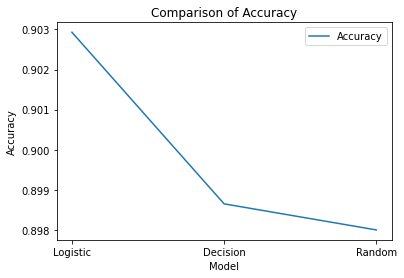

In [0]:
import matplotlib.pyplot as plt

# convert the 'value' column to a pandas Series and plot it
df1.select('Accuracy').toPandas().plot(kind='line')

# set the plot title and axis labels
plt.title('Comparison of Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

# set the x-axis labels
plt.xticks([0, 1, 2], ['Logistic', 'Decision', 'Random'], )

# display the plot
plt.show()

In [0]:
# Since the highest accuracy is found in Logistic regression we will generate our call list using Logistic Regression
from pyspark.ml.evaluation import BinaryClassificationEvaluator

In [0]:
pred_labels = lrModel.evaluate(test_data1)

In [0]:
pred_labels.predictions.show()

+--------------------+---------------+-----+--------------------+--------------------+----------+
|Independant Features|response_binary|  _c0|       rawPrediction|         probability|prediction|
+--------------------+---------------+-----+--------------------+--------------------+----------+
|(15,[0,1,2,3,8,10...|              1|39675|[4.03607164712592...|[0.98263995785024...|       0.0|
|(15,[0,1,2,3,8,10...|              0| 6938|[3.80355870680692...|[0.97819476476459...|       0.0|
|(15,[0,1,2,3,8,10...|              0|  134|[3.81401793084174...|[0.97841674530619...|       0.0|
|(15,[0,1,2,3,8,10...|              0|   49|[2.93541184474102...|[0.94956946511512...|       0.0|
|(15,[0,1,2,3,8,10...|              0|  813|[4.05666493007100...|[0.98298778251995...|       0.0|
|(15,[0,1,2,3,8,10...|              0|36416|[4.32700635484593...|[0.98696512639142...|       0.0|
|(15,[0,1,2,3,8,10...|              0| 3604|[5.46166087856468...|[0.99577145951558...|       0.0|
|(15,[0,1,2,3,8,10..

In [0]:
pred_labels.predictions.filter(F.col("prediction") == 1).show()

+--------------------+---------------+-----+--------------------+--------------------+----------+
|Independant Features|response_binary|  _c0|       rawPrediction|         probability|prediction|
+--------------------+---------------+-----+--------------------+--------------------+----------+
|(15,[0,1,2,5,8,10...|              1|38927|[-5.1190501343673...|[0.00594613400878...|       1.0|
|(15,[0,1,2,5,8,10...|              1|  569|[-1.0756760707931...|[0.25432515189869...|       1.0|
|(15,[0,1,2,5,8,10...|              1|37506|[-0.8928098279328...|[0.29053031810692...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 5856|[-0.4629187316407...|[0.38629364839746...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 4607|[-0.1485888421450...|[0.46292098556971...|       1.0|
|(15,[0,1,2,5,8,10...|              1|38694|[-3.2162705132982...|[0.03855800468287...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 3548|[-2.8602094155678...|[0.05415597256440...|       1.0|
|(15,[0,1,2,5,8,10..

In [0]:
pred_labels.predictions.filter(F.col("prediction") == 1).count()

Out[428]: 668

In [0]:
df_pred=pred_labels.predictions.filter(F.col("prediction") == 1)

In [0]:
type(df_pred)

Out[430]: pyspark.sql.dataframe.DataFrame

In [0]:
df_pred.show()

+--------------------+---------------+-----+--------------------+--------------------+----------+
|Independant Features|response_binary|  _c0|       rawPrediction|         probability|prediction|
+--------------------+---------------+-----+--------------------+--------------------+----------+
|(15,[0,1,2,5,8,10...|              1|38927|[-5.1190501343673...|[0.00594613400878...|       1.0|
|(15,[0,1,2,5,8,10...|              1|  569|[-1.0756760707931...|[0.25432515189869...|       1.0|
|(15,[0,1,2,5,8,10...|              1|37506|[-0.8928098279328...|[0.29053031810692...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 5856|[-0.4629187316407...|[0.38629364839746...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 4607|[-0.1485888421450...|[0.46292098556971...|       1.0|
|(15,[0,1,2,5,8,10...|              1|38694|[-3.2162705132982...|[0.03855800468287...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 3548|[-2.8602094155678...|[0.05415597256440...|       1.0|
|(15,[0,1,2,5,8,10..

In [0]:
#Check dimensions
print((df_pred.count(),len(df_pred.columns)))

(668, 6)


In [0]:
# Convert the "Independant Features" column to a string data type using the cast() function
df_pred = df_pred.withColumn("Independant Features", df_pred["Independant Features"].cast("string"))
df_pred = df_pred.withColumn("rawPrediction", df_pred["rawPrediction"].cast("string"))
df_pred = df_pred.withColumn("probability", df_pred["probability"].cast("string"))

# Define the path and file name of the CSV file to be saved
output_path1 = "dbfs:/FileStore/predict_list.csv"

# Write the DataFrame to CSV
df_pred.write.format("csv").mode("overwrite").option("header", "true").csv(output_path1)

In [0]:

#dbfs:/FileStore/predict_list.csv

predict_list_path = "dbfs:/FileStore/predict_list.csv"
predict_list = spark.read.csv(predict_list_path, header = 'True', inferSchema = 'True')
predict_list.show()

+--------------------+---------------+-----+--------------------+--------------------+----------+
|Independant Features|response_binary|  _c0|       rawPrediction|         probability|prediction|
+--------------------+---------------+-----+--------------------+--------------------+----------+
|(15,[0,1,2,5,8,10...|              1|38927|[-5.1190501343673...|[0.00594613400878...|       1.0|
|(15,[0,1,2,5,8,10...|              1|  569|[-1.0756760707931...|[0.25432515189869...|       1.0|
|(15,[0,1,2,5,8,10...|              1|37506|[-0.8928098279328...|[0.29053031810692...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 5856|[-0.4629187316407...|[0.38629364839746...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 4607|[-0.1485888421450...|[0.46292098556971...|       1.0|
|(15,[0,1,2,5,8,10...|              1|38694|[-3.2162705132982...|[0.03855800468287...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 3548|[-2.8602094155678...|[0.05415597256440...|       1.0|
|(15,[0,1,2,5,8,10..

In [0]:
predict_list.sort(col("_c0").asc()).show()

+--------------------+---------------+----+--------------------+--------------------+----------+
|Independant Features|response_binary| _c0|       rawPrediction|         probability|prediction|
+--------------------+---------------+----+--------------------+--------------------+----------+
|(15,[0,1,5,8,10,1...|              0|  43|[-1.5363417897434...|[0.17706770032134...|       1.0|
|(15,[0,1,3,5,8,10...|              0|  59|[-2.6755045738914...|[0.06443434214714...|       1.0|
|(15,[0,1,5,6,8,10...|              1|  86|[-2.0726857256423...|[0.11178010728485...|       1.0|
|(15,[0,1,2,5,8,10...|              1| 569|[-1.0756760707931...|[0.25432515189869...|       1.0|
|(15,[0,1,5,7,8,10...|              1| 694|[-1.4463839009301...|[0.19055871111734...|       1.0|
|(15,[0,1,3,5,8,10...|              0| 960|[-1.8084088038813...|[0.14083054616310...|       1.0|
|[35.0,1.0,2.0,1.0...|              1|1193|[-0.3291215010057...|[0.41845439083634...|       1.0|
|(15,[0,5,8,10,11,...|        